In [1]:
%pip install matplotlib astropy numpy h5py

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astrodendro-0.2.1.dev42+g3181c36.d20240710-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy import coordinates as coords
from astropy import units as u
from astropy.io.fits import getdata

In [3]:
from astropy.io import fits
array = fits.getdata('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits')
from astrodendro import Dendrogram
d = Dendrogram.compute(array, min_value=5.0, min_delta=5.0, min_npix=100)
d.trunk

[<Structure type=branch idx=1>,
 <Structure type=leaf idx=5>,
 <Structure type=branch idx=14>,
 <Structure type=leaf idx=17>,
 <Structure type=leaf idx=18>,
 <Structure type=leaf idx=19>]

In [4]:
d.leaves

[<Structure type=leaf idx=0>,
 <Structure type=leaf idx=3>,
 <Structure type=leaf idx=5>,
 <Structure type=leaf idx=9>,
 <Structure type=leaf idx=10>,
 <Structure type=leaf idx=11>,
 <Structure type=leaf idx=12>,
 <Structure type=leaf idx=13>,
 <Structure type=leaf idx=15>,
 <Structure type=leaf idx=16>,
 <Structure type=leaf idx=17>,
 <Structure type=leaf idx=18>,
 <Structure type=leaf idx=19>]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astrodendro-0.2.1.dev42+g3181c36.d20240710-py3.12.egg/astrodendro/viewer.py:96: UserWarning: `WCSAxes` package required for wcs coordinate display.
  warnings.warn("`WCSAxes` package required for wcs coordinate display.")


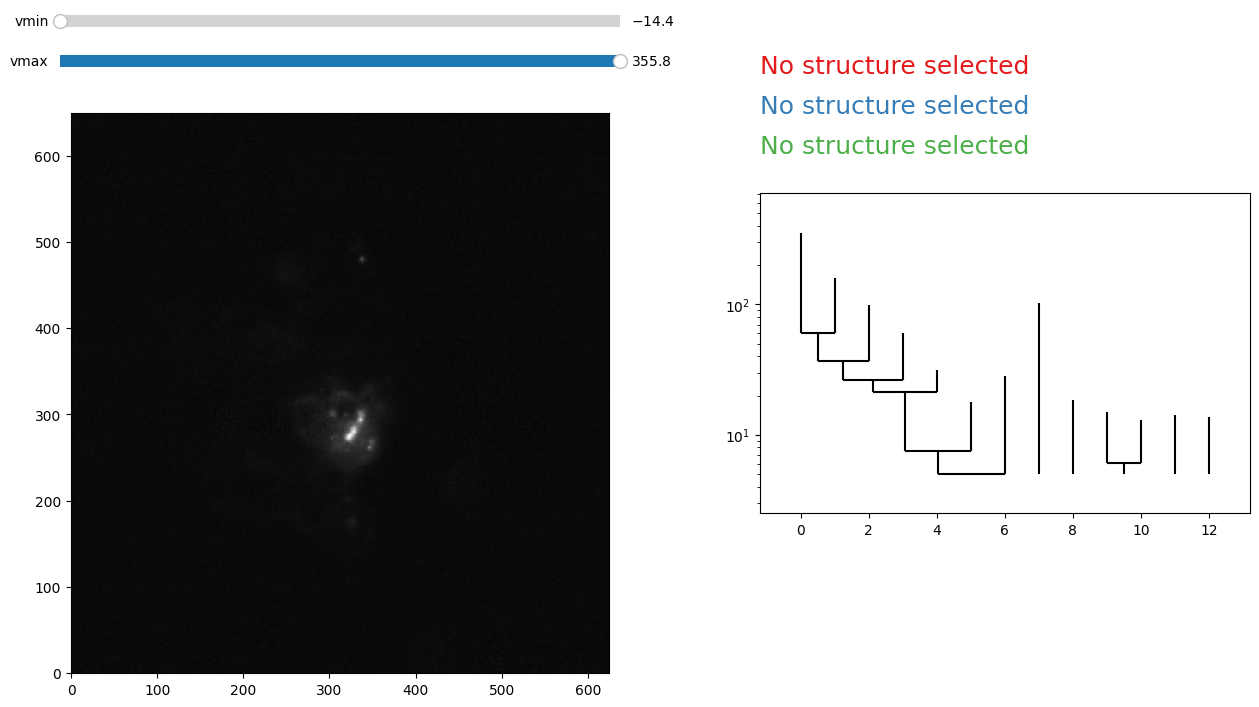

In [5]:
#from astropy.io.fits import getdata
#from astropy import wcs

#data, header = getdata('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits', header=True)
#wcs = wcs.WCS(header)
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astrodendro import Dendrogram

filename = get_pkg_data_filename('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits')
array = fits.getdata('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

d = Dendrogram.compute(array, min_value=5.0, min_delta=5.0, min_npix=100, wcs=wcs)
v = d.viewer()
v.show()

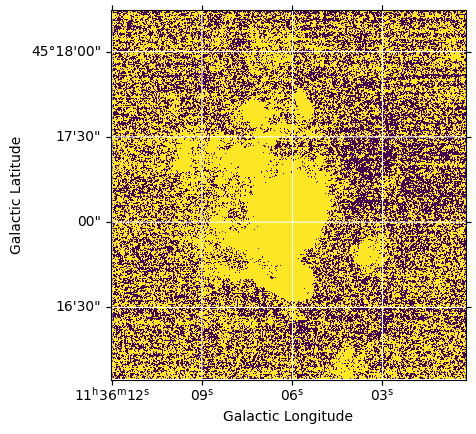

In [6]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

Text(0, 0.5, 'Flux')

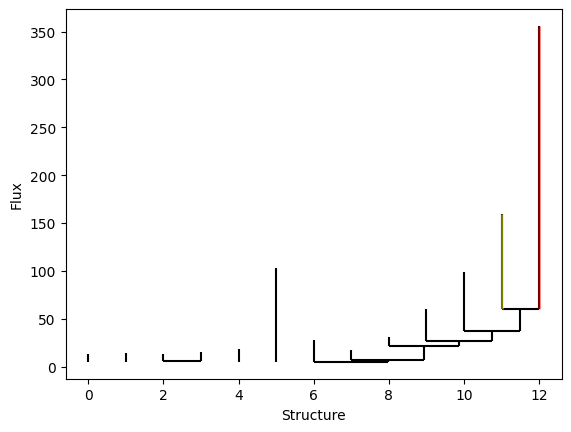

In [7]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astrodendro import Dendrogram

image = fits.getdata('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits')
d = Dendrogram.compute(image, min_value=5.0, min_delta=5.0, min_npix=100)
p = d.plotter()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot the whole tree
p.plot_tree(ax, color='black')

# Highlight two branches
p.plot_tree(ax, structure=10, color='red', lw=2, alpha=0.5)
p.plot_tree(ax, structure=9, color='yellow', lw=2, alpha=0.5)
#p.plot_tree(ax, structure=14, color='orange', lw=2, alpha=0.5)
#p.plot_tree(ax, structure=19, color='red', lw=2, alpha=0.5)

# Add axis labels
ax.set_xlabel("Structure")
ax.set_ylabel("Flux")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astrodendro-0.2.1.dev42+g3181c36.d20240710-py3.12.egg/astrodendro/plot.py:159: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(mask, levels=[0.5], **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astrodendro-0.2.1.dev42+g3181c36.d20240710-py3.12.egg/astrodendro/plot.py:159: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(mask, levels=[0.5], **kwargs)


(100.0, 500.0)

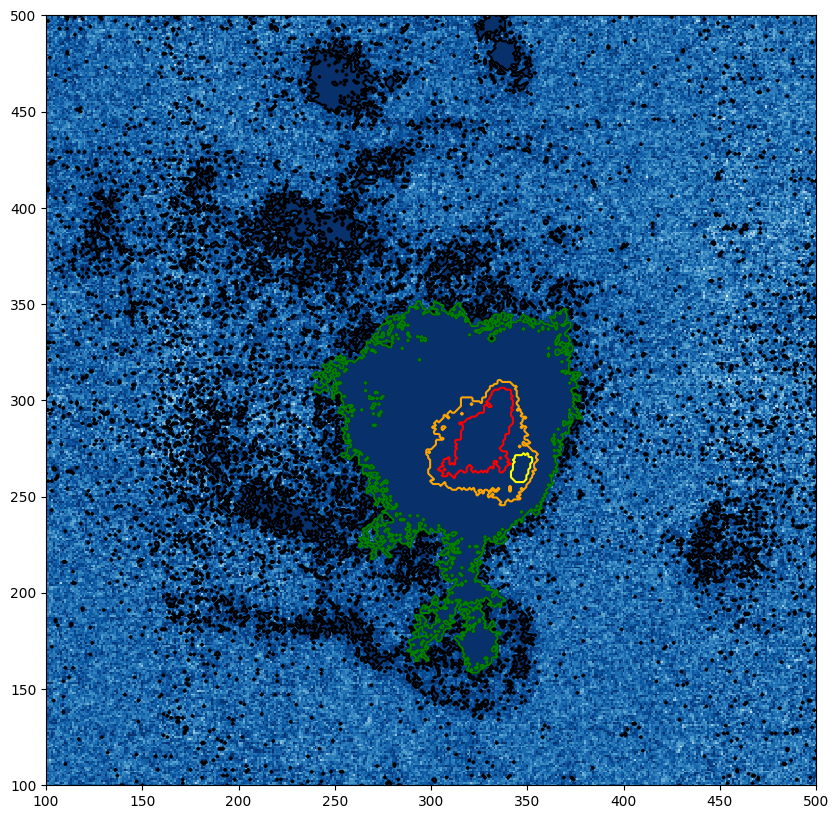

In [8]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astrodendro import Dendrogram

image = fits.getdata('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits')
d = Dendrogram.compute(image, min_value=5.0, min_delta=5.0, min_npix=100)
p = d.plotter()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, origin='lower', interpolation='nearest', cmap=plt.cm.Blues, vmax=4.0)

# Show contour for ``min_value``
p.plot_contour(ax, color='black')

# Highlight two branches
p.plot_contour(ax, structure=9, lw=2, colors='yellow')
p.plot_contour(ax, structure=8, lw=2, colors='orange')
p.plot_contour(ax, structure=10, lw=2, colors='red')
p.plot_contour(ax, structure=1, lw=2, colors='green')
#p.plot_contour(ax, structure=7, lw=2, colors='purple')

ax.set_xlim(100., 500.)
ax.set_ylim(100., 500.)

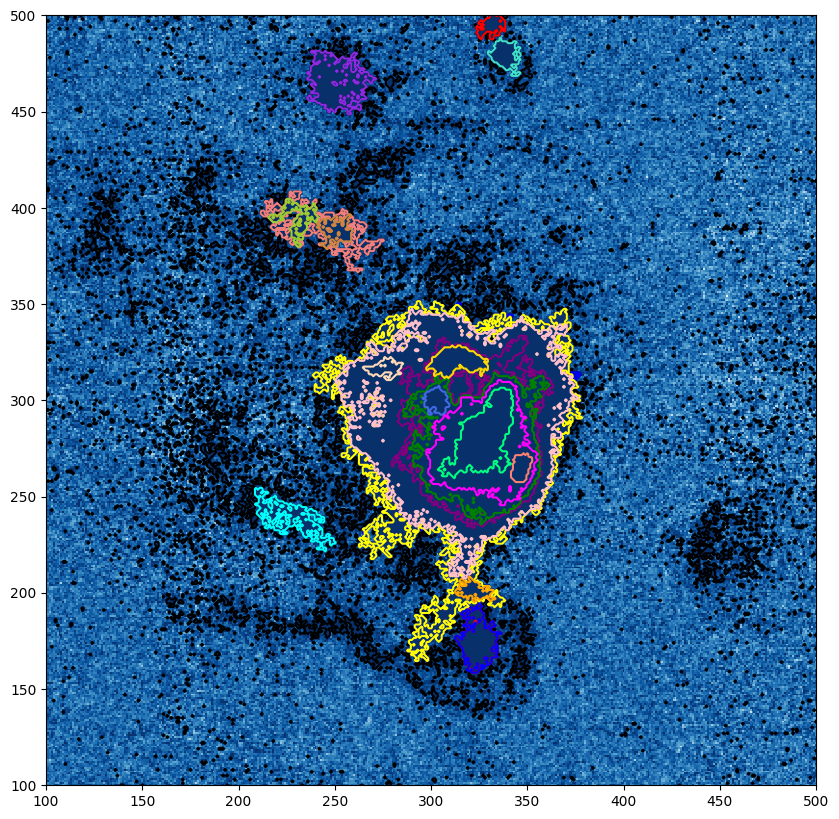

In [9]:
import itertools
import matplotlib.pyplot as plt
from astropy.io import fits
from astrodendro import Dendrogram

# Define color_list with a set of colors
color_list = ['red', 'blue', 'yellow', 'orange', 'pink', 'cyan', 'purple', 'green', 'magenta', 'salmon', 'springgreen', 'royalblue', 'peachpuff', 'gold', 'lightcoral', 'peru', 'yellowgreen', 'blueviolet', 'turquoise']

# Load your image data
image = fits.getdata('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits')

# Compute the dendrogram
d = Dendrogram.compute(image, min_value=5.0, min_delta=5.0, min_npix=100)
p = d.plotter()

# Setup the figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, origin='lower', interpolation='nearest', cmap=plt.cm.Blues, vmax=4.0)

# Show contour for ``min_value``
p.plot_contour(ax, color='black')

# Cycle through color_list indefinitely
color_cycle = itertools.cycle(color_list)

# Generate numbers from 0 to 60 and plot contours with cycling colors
for num in range(20):  # Generates numbers 0 through 60
    color = next(color_cycle)  # Get the next color from the cycle
    p.plot_contour(ax, structure=num, lw=2, colors=color)

ax.set_xlim(100., 500.)
ax.set_ylim(100., 500.)

plt.show()  # Display the plot

In [10]:
import matplotlib.pyplot as plt
from astropy.io import fits
import astrodendro
from astrodendro import Dendrogram
from astrodendro.analysis import PPStatistic

image = fits.getdata('/Users/jameswells/Documents/astro/datasets/ngc3741data/ngc3741Deepae_crop.fits')
d = Dendrogram.compute(image, min_value=5.0, min_delta=5.0, min_npix=100)

from astropy import units as u
metadata = {}
metadata['data_unit'] = u.Jy / u.beam
metadata['spatial_scale'] =  6 * u.arcsec
metadata['beam_major'] =  22.9 * u.arcsec # FWHM
metadata['beam_minor'] =  22.9 * u.arcsec # FWHM

print(astrodendro.__file__)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astrodendro-0.2.1.dev42+g3181c36.d20240710-py3.12.egg/astrodendro/__init__.py


In [11]:
print(d.leaves)

[<Structure type=leaf idx=0>, <Structure type=leaf idx=3>, <Structure type=leaf idx=5>, <Structure type=leaf idx=9>, <Structure type=leaf idx=10>, <Structure type=leaf idx=11>, <Structure type=leaf idx=12>, <Structure type=leaf idx=13>, <Structure type=leaf idx=15>, <Structure type=leaf idx=16>, <Structure type=leaf idx=17>, <Structure type=leaf idx=18>, <Structure type=leaf idx=19>]


In [12]:
print(d.trunk)

[<Structure type=branch idx=1>, <Structure type=leaf idx=5>, <Structure type=branch idx=14>, <Structure type=leaf idx=17>, <Structure type=leaf idx=18>, <Structure type=leaf idx=19>]


In [13]:
#total flux from all leaves
flux_new_sum = 0
for i, leaf in enumerate(d.leaves):
    stat = PPStatistic(leaf, metadata=metadata)
    flux_new_sum += stat.flux_new
    print(f"Iteration {i}: {stat.flux_new}")

print(f"Sum of flux_new: {flux_new_sum}")

Iteration 0: 4620.303139209747
Iteration 1: 1311.8399996757507
Iteration 2: 2954.809621334076
Iteration 3: 9916.917671203613
Iteration 4: 111366.60389328003
Iteration 5: 7283.113265991211
Iteration 6: 2889.7020626068115
Iteration 7: 11050.200336456299
Iteration 8: 1471.9943284988403
Iteration 9: 1481.1796317100525
Iteration 10: 5275.886975765228
Iteration 11: 3833.8856534957886
Iteration 12: 1030.9682245254517
Sum of flux_new: 164487.4048037529


In [14]:
#total flux from all trunks (total flux in dendrogram)
total_flux_sum = 0
for i, trunk in enumerate(d.trunk):
    stat = PPStatistic(trunk, metadata=metadata)
    total_flux_sum += stat.flux_new
    print(f"Iteration {i}: {stat.flux_new}")

print(f"Sum of total flux: {total_flux_sum}")

Iteration 0: 364897.2153162956
Iteration 1: 2954.809621334076
Iteration 2: 5677.017488002777
Iteration 3: 5275.886975765228
Iteration 4: 3833.8856534957886
Iteration 5: 1030.9682245254517
Sum of total flux: 383669.78327941895


In [15]:
#prints total flux from branch 4 (which is interior structure of HII region)
s = d.trunk[0]
s2 = s.children[1]
print(s2.children[1])
stat = PPStatistic(s2.children[1],metadata=metadata)
print(stat.flux_new)

<Structure type=branch idx=4>
342677.2243542671


In [16]:
#sum of flux in all leaves within branch 4 (interior structure HII)
flux_new_sum = 0
for i, leaf in enumerate(d.leaves):
    if 3 <= i <= 7:  # Check if iteration is within the desired range
        stat = PPStatistic(leaf, metadata=metadata)
        flux_new_sum += stat.flux_new
        print(f"Iteration {i}: {stat.flux_new}")

print(f"Sum of flux_new for iterations 3 to 7, which is all interior leaves from branch 4: {flux_new_sum}")

Iteration 3: 9916.917671203613
Iteration 4: 111366.60389328003
Iteration 5: 7283.113265991211
Iteration 6: 2889.7020626068115
Iteration 7: 11050.200336456299
Sum of flux_new for iterations 3 to 7, which is all interior leaves from branch 4: 142506.53722953796


In [17]:
#sums flux of each leaf in interior HII region, and calculates the percentage of each leaf to the total 
flux_new_sum = 0
# First, calculate the total sum for iterations 3 to 7
for i, leaf in enumerate(d.leaves):
    if 3 <= i <= 7:  # Check if iteration is within the desired range
        stat = PPStatistic(leaf, metadata=metadata)
        flux_new_sum += stat.flux_new

# Then, calculate and print the percentage for each leaf in the range
for i, leaf in enumerate(d.leaves):
    if 3 <= i <= 7:
        stat = PPStatistic(leaf, metadata=metadata)
        percentage_of_total = (stat.flux_new / flux_new_sum) * 100  # Calculate percentage
        print(f"Iteration {i}: {stat.flux_new} - {percentage_of_total:.2f}% of total")

print(f"Sum of all interior leaves from branch 4: {flux_new_sum}")

Iteration 3: 9916.917671203613 - 6.96% of total
Iteration 4: 111366.60389328003 - 78.15% of total
Iteration 5: 7283.113265991211 - 5.11% of total
Iteration 6: 2889.7020626068115 - 2.03% of total
Iteration 7: 11050.200336456299 - 7.75% of total
Sum of all interior leaves from branch 4: 142506.53722953796


In [18]:
#sums total flux within interior HII region (above branch 4), subtracts leaves-sum of high surface brightness areas,
#this is done to get remaining flux that has not yet been included

# Step 1: Calculate flux_new_sum for leaves in iterations 3 to 7
flux_new_sum = 0
for i, leaf in enumerate(d.leaves):
    if 3 <= i <= 7:
        stat = PPStatistic(leaf, metadata=metadata)
        flux_new_sum += stat.flux_new

# Step 2: Calculate total_flux_sum from above branch 4
s = d.trunk[0]
s2 = s.children[1]
stat = PPStatistic(s2.children[1],metadata=metadata)
total_flux_sum = stat.flux_new

# Step 3: Subtract flux_new_sum from total_flux_sum
remaining_flux_sum = total_flux_sum - flux_new_sum

print(f"Sum of total flux: {total_flux_sum}")
print(f"Sum of flux_new for iterations 3 to 7: {flux_new_sum}")
print(f"Remaining flux after subtraction: {remaining_flux_sum}")

Sum of total flux: 342677.2243542671
Sum of flux_new for iterations 3 to 7: 142506.53722953796
Remaining flux after subtraction: 200170.68712472916


In [19]:
#uses the percentages of of each 3-7 leaves iteration within branch 4 to distribute the remaining flux not included
#in those high surface brightness areas, then adds them to their original values

# Step 1: Calculate flux_new_sum for leaves in iterations 3 to 7
flux_new_sum = 0
leaf_flux_values = []  # Store original flux_new values for later use
for i, leaf in enumerate(d.leaves):
    if 3 <= i <= 7:
        stat = PPStatistic(leaf, metadata=metadata)
        flux_new_sum += stat.flux_new
        leaf_flux_values.append(stat.flux_new)

# Assume total_flux_sum is calculated as before

# Step 3: Calculate remaining_flux_sum
remaining_flux_sum = total_flux_sum - flux_new_sum

# Step 4 & 5: Calculate percentages and distribute remaining_flux_sum, then add to original values
updated_flux_values = []
for flux_new in leaf_flux_values:
    percentage_of_total = (flux_new / flux_new_sum) * 100
    additional_flux = (percentage_of_total / 100) * remaining_flux_sum
    updated_flux = flux_new + additional_flux
    updated_flux_values.append(updated_flux)

# Step 6: Print updated flux_new values for each leaf in iterations 3 to 7
fluxval=[]
for i, updated_flux in enumerate(updated_flux_values, start=3):
    fluxval.append(updated_flux)
    print(f"Iteration {i}: Updated flux_new = {updated_flux}")
    
np.savetxt("interiorh2reg.txt",fluxval,fmt="%s")
# Sum all of the updated flux values
total_updated_flux = sum(updated_flux_values)

print(f"Total of updated flux values: {total_updated_flux}")

Iteration 3: Updated flux_new = 23846.63811067227
Iteration 4: Updated flux_new = 267796.828481214
Iteration 5: Updated flux_new = 17513.28105480275
Iteration 6: Updated flux_new = 6948.699345840621
Iteration 7: Updated flux_new = 26571.77736173746
Total of updated flux values: 342677.22435426706
